## Case 6: Credit Card Clustering (Unsupervised Learning)
-----------------------------------------

We will be using the Credit Card Customer Data for this project.

----------------------------
## Context:
-----------------------------
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers hold negative perceptions of support services. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.


----------------------------
## Objective:
-----------------------------

Identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

--------------------------
## About the data:
--------------------------
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which a customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

- Sl_no - Customer Serial Number
- Customer Key - Customer identification
- Avg_Credit_Limit	- Average credit limit (currency is not specified, you can make an assumption around this)
- Total_Credit_Cards	- Total number of credit cards
- Total_visits_bank	- Total bank visits
- Total_visits_online -	 Total online visits
- Total_calls_made - Total calls made

## Importing libraries and overview of the dataset

In [3]:
#Import all the necessary packages

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


#uncomment below to install the sklearn_extra library
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.3 MB/s eta 0:00:00


#### Loading data

In [4]:
import requests
from io import StringIO

orig_url="https://drive.google.com/file/d/1Vr17LIVERV6mCrUauVGyQuz23cfpEts6/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
data = pd.read_csv(csv_raw)
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


#### Check the info of the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations:**

- There are 660 observations and 7 columns in the dataset.
- All columns have 660 non-null values i.e. there are no missing values.
- All columns are of int64 data type.

**There are no missing values. Let us now figure out the unique values in each column.**

In [6]:
data.nunique()

,0
Sl_No,660
Customer Key,655
Avg_Credit_Limit,110
Total_Credit_Cards,10
Total_visits_bank,6
Total_visits_online,16
Total_calls_made,11


- Customer key, which is an identifier, has repeated values. We should treat this variable accordingly before applying any algorithm.

## Data Preprocessing and Exploratory Data Analysis

#### **Identify and drop the rows with duplicated customer keys**

In [7]:
# Identify the duplicated customer keys
duplicate_keys = data[data.duplicated()]
duplicate_keys

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


We have done some basic checks. Now, let's drop the variables that are not required for our analysis.

In [8]:
data.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)

Now that we have dropped unnecessary column. We can again check for duplicates. Duplicates would mean customers with identical features.

In [9]:
data[data.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


We can drop these duplicated rows from the data

In [10]:
data=data[~data.duplicated()]

In [11]:
data.shape

(649, 5)

- After removing duplicated keys and rows and unnecessary columns, there are 649 unique observations and 5 columns in our data.

#### Summary Statistics

#### **Observations based on the summary statistics of the data**

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,649.0,34878.274268,37813.736638,3000.0,11000.0,18000.0,49000.0,200000.0
Total_Credit_Cards,649.0,4.708783,2.173763,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,649.0,2.397535,1.625148,0.0,1.0,2.0,4.0,5.0
Total_visits_online,649.0,2.624037,2.952888,0.0,1.0,2.0,4.0,15.0
Total_calls_made,649.0,3.590139,2.877911,0.0,1.0,3.0,5.0,10.0


**Observations:___________**
* The distribution of average credit limit is heavily skewed to the right. The median is `$18,000` while the mean is `$34,878`. There is also considerable variation among the individuals' credit limits as the standard deviation is `$37,813`.
* Half of the individuals have between 3 and 6 credit cards.
* Individuals typically make between 1 and 4 total bank visits, with a maximum values of 10.
* Total online visits also typically range between 1 and 4, with a maximum value of 15.
* Individuals typically make between 1 and 5 calls to the bank, with a maximum of 10.

#### Now let's go ahead with the exploring each variable at hand. We will check the distribution and outliers for each variable in the data. [Link to information about skewness](https://www.spss-tutorials.com/skewness/) -- optional.

### **Question 1: Data Visualizations**
- **1.a. Check the distribution of all variables (use .hist() method)**
- **1.b. Check outliers for all variables (use sns.boxplot())**
- **1.c. Write some observations**

Avg_Credit_Limit
Skew : 2.19


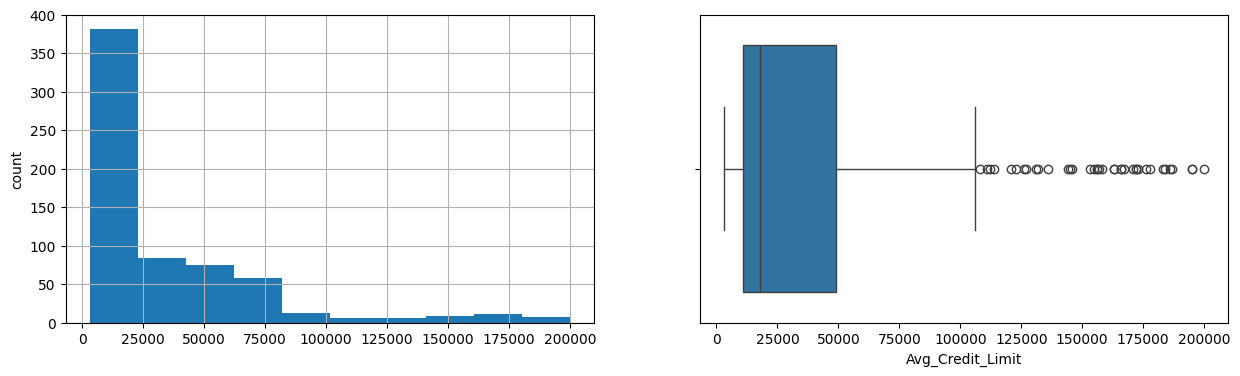

Total_Credit_Cards
Skew : 0.15


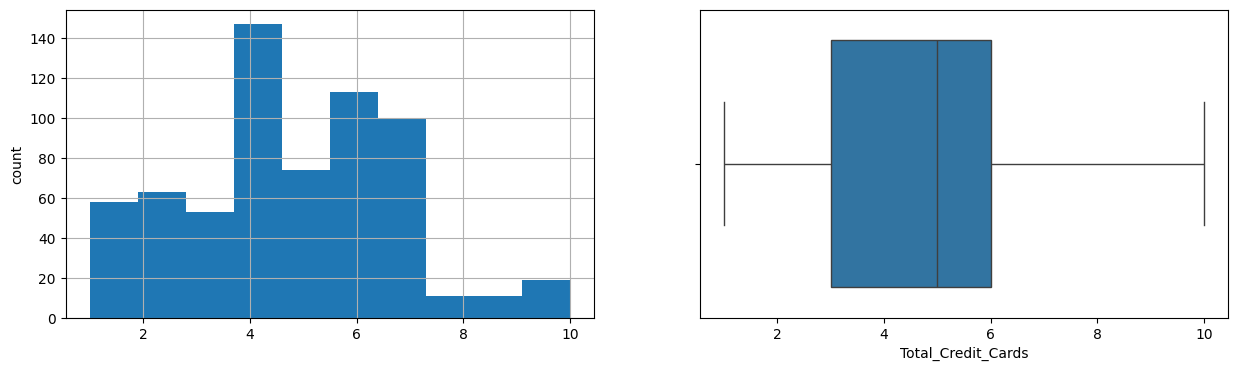

Total_visits_bank
Skew : 0.15


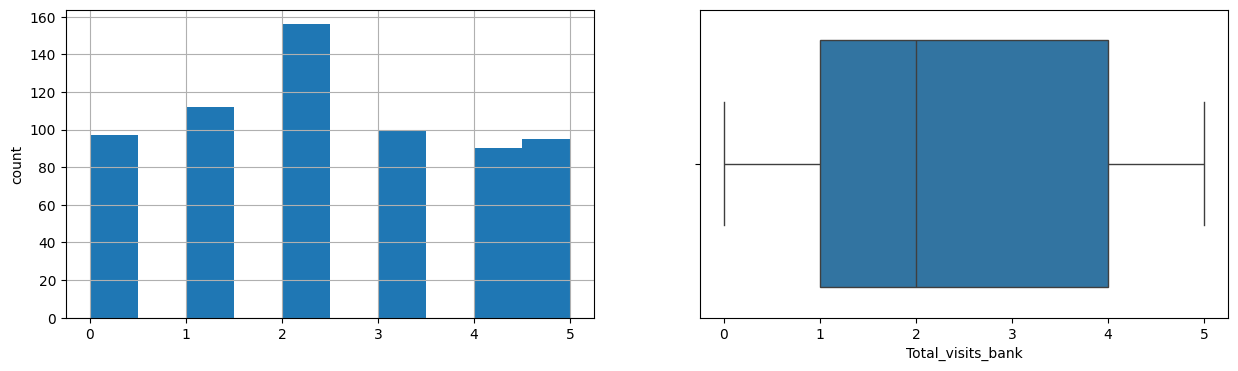

Total_visits_online
Skew : 2.21


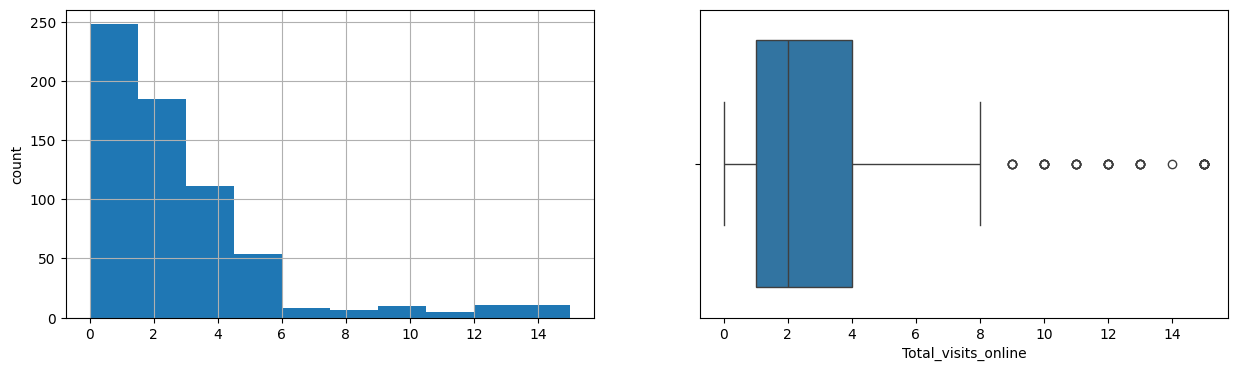

Total_calls_made
Skew : 0.66


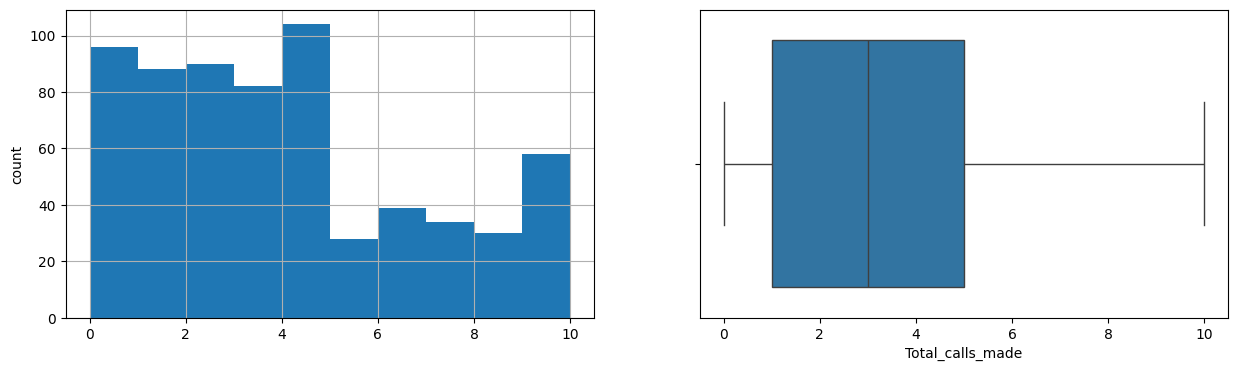

In [13]:
# Code to generate visualizations

for col in data.columns: # repeat these operations for each column
    print(col)
    print('Skew :',round(data[col].skew(),2)) # a way of measuring how much a distribution departs from a normal distribution
    plt.figure(figsize=(15,4)) # specifying the height and width of the plot
    plt.subplot(1,2,1) # subplot(nrows, ncols, index)
    data[col].hist() # histogram for each column --> data[col].hist()
    plt.ylabel('count')
    plt.subplot(1,2,2) # subplot(nrows, ncols, index)
    sns.boxplot(x=data[col]) #boxplot for each column --> sns.boxplot(x=data[col ])
    plt.show()

**1.c. Observations:**
- **The credit limit distribution seems to be skewed right, indicating high concentration between 0 - 25000**
- **The average number of credit cards held is about 5**

**Now, let's check the correlation among different variables.**

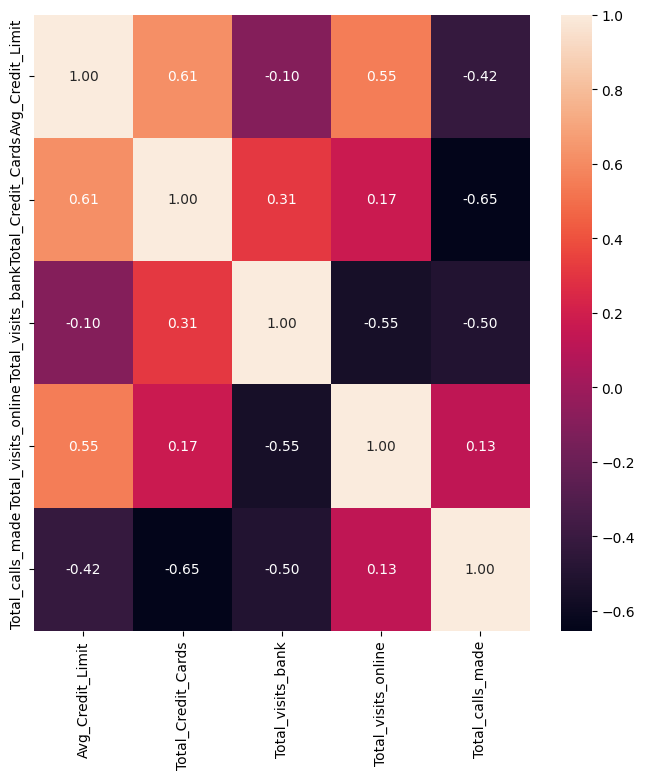

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, fmt='0.2f')
plt.show()

**Observation:**

- Avg_Credit_Limit is positively correlated with Total_Credit_Cards Total_visits_online which can makes sense.
- Avg_Credit_Limit is negatively correlated with Total_calls_made and Total_visits_bank.
- Total_visits_bank, Total_visits_online, Total_calls_made are negatively correlated which implies that majority of customers use only one of these channels to contact the bank.

#### Scaling the data

In [15]:
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [16]:
data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.723499,-1.247087,-0.860606,-0.550407,-1.248443
1,0.400209,-0.786701,-1.476410,2.499808,1.881237
2,0.400209,1.054846,-0.860606,0.127419,0.142526
3,-0.129107,0.134072,-0.860606,-0.550407,0.142526
4,1.723499,0.594459,-1.476410,3.177634,-0.205216


In [17]:
#Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled.copy(deep=True)

## K-Means

Let us now fit k-means algorithm on our scaled data and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the SSE for each k
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and find the elbow

The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum-of-squares criterion. Inertia can be recognized as a measure of how internally coherent clusters are.

![image](https://drive.google.com/uc?id=1cbPD8xheowR5D2ojiwb2zBWafRDUtEic)

This is what the KMeans tries to minimize with each iteration.

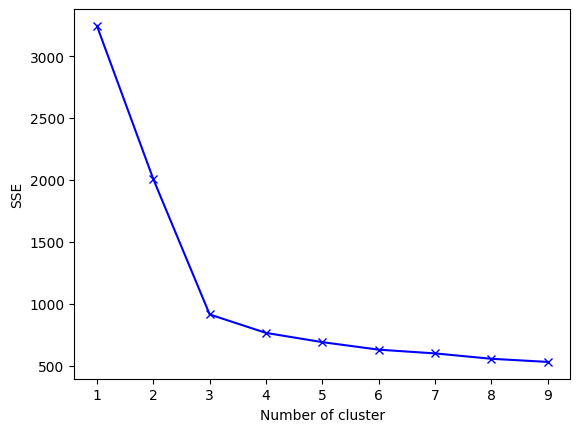

In [18]:
# step 1
sse = {} # creates an empty dictionary

# step 2 - iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and
# store the inertia value for that k
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=1).fit(data_scaled)
    sse[k] = kmeans.inertia_

# step 3
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

- Looking at the plot, we can say that elbow point is achieved for k=3.
- We will fit the k-means again with k=3 to get the labels.

### **Question 2: K_Means Decisions**

- **2.a. From the above elbow plot, state the reason for choosing k=3**

- **This is the point where the curve stats to flattenout indicating the ideal k value**

- **2.b. Explain why we need to use scaled data when determining clusters through the K_means method**

- **Because the method relies on the distance between data points to assign clusters. If the data is not scaled, features with larger ranges can disproportionately influence the clustering process, leading to biased results.**

In [20]:
kmeans = KMeans(n_clusters=3, random_state=1) #Apply the K-Means algorithm

kmeans.fit(data_scaled) #Fit the kmeans function on the scaled data

#Adding predicted labels to the original data and scaled data
data_scaled_copy['Labels'] = kmeans.predict(data_scaled) #Save the predictions on the scaled data from K-Means
data['Labels'] = kmeans.predict(data_scaled) #Save the predictions on the scaled data from K-Means

We have generated the labels with k-means. Let us look at the various features based on the labels.

#### **Create cluster profiles using the below summary statistics and box plots for each label**

In [21]:
#Number of observations in each cluster
data.Labels.value_counts()

,count
Labels,
0,378
1,221
2,50


In [22]:
#Calculating summary statistics of the original data for each label
mean = data.groupby('Labels').mean()
median = data.groupby('Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,34071.428571,12239.819005,141040.00,32000.0,12000.0,145500.0
Total_Credit_Cards,5.518519,2.411765,8.74,6.0,2.0,9.0
Total_visits_bank,3.484127,0.945701,0.60,3.0,1.0,1.0
Total_visits_online,0.981481,3.561086,10.90,1.0,4.0,11.0
Total_calls_made,1.992063,6.891403,1.08,2.0,7.0,1.0


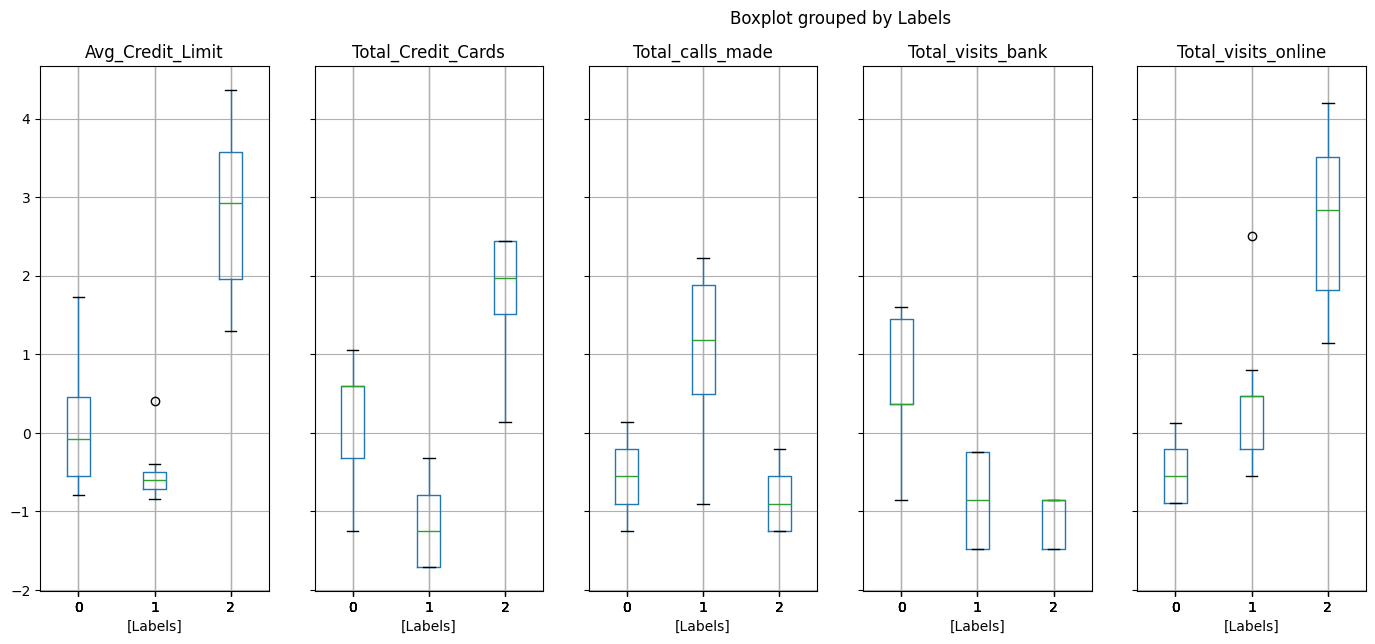

In [23]:
#Visualizing different features w.r.t K-means labels
data_scaled_copy.boxplot(by = 'Labels', layout = (1,6),figsize=(20,7))
plt.show()

### **Question 3: Describe the Cluster Profiles based on the statistical summary and the boxplots**

* **Cluster 0 high total bank visits**

* **Cluster 1 high calls made, and less credit limit and credit card holdings**

* **Cluster 2 High credit limit and total online visits**

## OPTIONAL CONTENT BELOW THIS LINE
-------------------------------------------------------

## Gaussian Mixture

Let's create clusters using Gaussian Mixture Models

#### Using Gaussian Mixture Algorithem:

- **Apply the Gaussian Mixture algorithm on the scaled data with random_state=1**
- **Create cluster profiles using the below summary statistics and box plots for each label**
- **Compare the clusters from both algorithms - K-means and Gaussian Mixture**

In [ ]:
gmm = GaussianMixture(n_components = 3, random_state = 1) #Apply the Gaussian Mixture algorithm
gmm.fit(data_scaled) #Fit the gmm function on the scaled data

data_scaled_copy['GmmLabels'] = gmm.predict(data_scaled)
data['GmmLabels'] = gmm.predict(data_scaled)

In [ ]:
#Number of observations in each cluster
data.GmmLabels.value_counts()

In [ ]:
#Calculating summary statistics of the original data for each label
original_features = ["Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made"]

mean = data.groupby('GmmLabels').mean()
median = data.groupby('GmmLabels').median()
df_gmm = pd.concat([mean, median], axis=0)
df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_gmm[original_features].T

In [ ]:
# plotting boxplots with the new GMM based labels

features_with_lables = ["Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made","GmmLabels"]

data_scaled_copy[features_with_lables].boxplot(by = 'GmmLabels', layout = (1,5),figsize=(20,7))
plt.show()

**Cluster Profiles:____________**  
* Cluster 0 includes individuals who have a low average credit limit, very few or no credit cards and use the phone as the primary method to contact the bank.
* Cluster 1 reflects average credit limits and average number of credit cards and a tendency to contact the bank in person.
* Cluster 2 Shows very high averge credit limit, high count of credit cards and a tendency to use online bank services.

**Comparing Clusters:____________**  
The results obtained with the Gaussian Mixture method are similar to those generated by the application of the K-Means algorithm.

## K-Medoids

### Using the K-Medioids Algorithm

- **Apply the K-Medioids on the scaled data with random_state=1**
- **Create cluster profiles using the below summary statistics and box plots for each label**
- **Compare the clusters from both algorithms - K-Means and K-Medioids**

In [ ]:
kmedo = KMedoids(n_clusters = 3, random_state=1) #Apply the K-Medoids algorithm
kmedo.fit(data_scaled) #Fit the kmedo function on the scaled data

data_scaled_copy['kmedoLabels'] = kmedo.predict(data_scaled)
data['kmedoLabels'] = kmedo.predict(data_scaled)

In [ ]:
#Number of observations in each cluster
data.kmedoLabels.value_counts()

In [ ]:
#Calculating summary statistics of the original data for each label
mean = data.groupby('kmedoLabels').mean()
median = data.groupby('kmedoLabels').median()
df_kmedoids = pd.concat([mean, median], axis=0)
df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmedoids[original_features].T

In [ ]:
#plotting boxplots with the new DBScan based labels

features_with_lables = ["Avg_Credit_Limit",	"Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made","kmedoLabels"]

data_scaled_copy[features_with_lables].boxplot(by = 'kmedoLabels', layout = (1,5),figsize=(20,7))
plt.show()

Let's compare the clusters from K-Means and K-Medoids

In [ ]:
comparison = pd.concat([df_kmedoids, df_kmeans], axis=1)[original_features]
comparison

**Cluster Profiles:____________**  
* Cluster 0 is defined by low average credit limits and low credit card counts with a tendencey to contact the bank by phone.
* Cluster 1 Shows a high average credit limit, high count of credit cards and a tendency to use online bank services.
* Cluster 2 reflects average credit limits and average number of credit cards and a tendency to contact the bank in person.

**Comparing Clusters:___________________**
The clustering pattern generated with the application of K-Medioids is very similar to the pattern observed in the output derived through the use of K-Means and Gaussian Mixture except for Clusters 1 and 2 are flipped.